# Assignment 3 Task 2-CNN
In this example, I will use PyTorch to train Neural Network detecting hand written digit similar to the lab. Howver we will use EMNIST (Extended-MNIST) datasets on this occasion.  

I will be importing the package "torch" in order to use `PyTorch` and `heading.py` created by Helen;

*There is small changes in `heading.py` to load EMNIST datasets

In [1]:
from heading import *
import torch

### THE EMNIST  (Extended MNIST) Datasets

EMNIST contain six different splits provided in this dataset. ByClass, ByMerge, Balanced, Letters, Digits, MNIST. EMNIST MNIST: 70,000 characters. 10 balanced classes. It is a subset of a larger set available from NIST. The images are grey scale, 28x28 pixels. EMNIST dataset structure that directly matches the MNIST dataset

### 1. Self-defined Convolutional Neural Network (CNN)

In this part we create a self-defined CNN class with the following structural parameters:
#### Input channel:
* Input channel number is 1 for gray images (3 for RGB colour images)

#### Two convolutional layers: CNV_layer 1 and CNV_layer 2
* CNV_layer 1:  
 * convolutional layer parameters: input channels:1, output channels:16, filter size: 3x3, stride: 2, and padding: 1
 * max pooling layer: 2x2
 * activation function: ReLU()
 * Batch normalisation: 16
 
Example: 

`torch.nn.Sequential(
            torch.nn.Conv2d(input_channels,16,3,2,1),
            torch.nn.MaxPool2d(2),
            torch.nn.ReLU(),
            torch.nn.BatchNorm2d(16)
        )`

* CNV_layer 2: 
 * convolutional layer: 
   * input channel:16, 
   * output channel:32, 
   * filter size: 3x3, 
   * panding:1, and 
   * stride: 1
 * Max pooling layer:2
 * Activation function: ReLU()
 * Batch normalisation: 32
 
#### Flattening 
The output channels of CNV_layer 2 will be flattened to be a column vector of size 288.
 
#### Three fully connected layers: FC_layer_1,  FC_layer_2 and FC_layer_3
 * FC_layer_1 
  * Input nodes: 288, 
  * Output nodes: 60, 
  * Drop out ratio: 0.5
  * Activation function: ReLU()
  
Example: 

`torch.nn.Sequential(
            torch.nn.Linear(288,60),
            torch.nn.Dropout(0.5),
            torch.nn.ReLU()
        )`
  
 * FC_layer_2
  * Input nodes: 60, 
  * Output nodes: 20, 
  * Drop out ratio: 0.5
  * Activation function: ReLU()
  
 * FC_layer_3
  * input nodes: 20
  * output nodes: 10
  
#### Output
  * output nodes: 10 for 10 classes with each class representing one digit.

Here we define the CNN class with the structural parameters above. (Provided by Helen)

In [2]:
class CONV_net(torch.nn.Module):

    def __init__(self, input_channels = 1, output_size = 10):
        super().__init__()
        
        self.conv1 = torch.nn.Sequential(
            torch.nn.Conv2d(input_channels,16,3,2,1),
            torch.nn.MaxPool2d(2),
            torch.nn.ReLU(),
            torch.nn.BatchNorm2d(16)
        )
        self.conv2 = torch.nn.Sequential(
            torch.nn.Conv2d(16,32,3,1,1),
            torch.nn.MaxPool2d(2),
            torch.nn.ReLU(),
            torch.nn.BatchNorm2d(32)
        )
        self.fc1 = torch.nn.Sequential(
            torch.nn.Linear(288,60),
            torch.nn.Dropout(0.5),
            torch.nn.ReLU()
        )
        self.fc2 = torch.nn.Sequential(
            torch.nn.Linear(60,20),
            torch.nn.Dropout(0.5),
            torch.nn.ReLU()
        )
        self.fc3 = torch.nn.Linear(20, output_size)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(-1,288)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

we will create CNN network using `create_network(network)`.

In [3]:
convlution = CONV_net(input_channels = 1, output_size = 10)
net_work = create_network(convlution)

### Load MNIST datasets

define the input image size, the default size is 28.

In [4]:
image_size = 28

resize the image shape to fit different networks.

In [5]:
transform = resize_image(image_size)

Divide the dataset into BATCH_SIZE equal parts for training.

In [6]:
BATCH_SIZE = 64

Load the train data and test data separately by `load_EMNIST_data(transform, batch size, train or not, folder path = 'Data')` method. 

For training data, we need to set the train argument is True. 
For testing data, we need to set the train argument is False. 

*`load_EMNIST_data` function is created by me

In [7]:
train_loader = load_EMNIST_data(transform, BATCH_SIZE, train = True,  PATH = 'Data',split = 'mnist')
test_loader = load_EMNIST_data(transform, BATCH_SIZE, train = False, PATH = 'Data',split = 'mnist')

### Train Model

Here we need set the epoch and learning rate.

In [8]:
EPOCH = 1
LR = 0.001

Then, we can use `train_model(Network, train loader, learning rate, number of epoch)` to train the model. 

In [9]:
trained_model = train_model(net_work, train_loader, LR, EPOCH)

[1,100] loss:1.695
[1,200] loss:0.969
[1,300] loss:0.717
[1,400] loss:0.615
[1,500] loss:0.527
[1,600] loss:0.480
[1,700] loss:0.437
[1,800] loss:0.418
[1,900] loss:0.414


### Test Model

We can use `test_model(trained model, test loader)`.

In [10]:
test_model(trained_model, test_loader)

correct1:  tensor(9769)
Test acc: 0.9769


### Save Model

To save this model, we can use the :
`torch.save(trained_model, './my_model.pth')`

In [11]:
torch.save(trained_model, './my_model.pth')

Predict real images, here we need to define model, image size and number of prediction. 

In [12]:
model = trained_model
image_size = 28
num_of_prediction = 20

To see how does it work we can use this code :

`predict_image(trained model, image size, number of prediction)`. 

[7 4 6 4 3 9 7 7 2 8 3 4 0 3 9 5 4 7 3 5]
The predict result is [7 4 6 9 3 9 7 7 2 8 3 4 0 3 9 5 4 7 3 5]


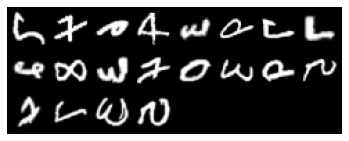

In [13]:
predict_image(model, image_size, num_of_prediction)